# Predicting Airbnb Prices in Seattle using CRISP DM Process and Machine Learning Techniques

The objective of the project to to analyse Seattle AirBnb dataset available at https://www.kaggle.com/datasets/airbnb/seattle?resource=download to help us understand the most popular and most expensive time to rent, how are the price distribution among neighbouthood, etc. We will also build a ML Model that determines the most important features based on which the prices are listed.

We will follow the CRISP-DM (Cross-Industry Standard Process for Data Mining) methodology, which consists of the following steps:

1. Business Understanding
2. Data Understanding 
3. Prepare Data
4. Data Modeling 
5. Evaluation

## 1. Business Understanding

As part of this step, we will be performing anlysis on the data to visualise how these data could be used and answer the below questions,

    1.Which are the busiest or most popular time of the year to rent?
    2.Which is the most expensive month for listings?
    3.How are the prices varying across all neighbourgood in Seattle?
    4.Which features influence the most in determining the price of a listing? How can we model this?

Along with the above listed objectives, we will try to cover other questions such as what are the most expensive time of the year to rent, how many listings are published month wise, etc.
 

## 2. Data Understanding

Let us analyse the dataset to see how they could be used for answering our questions above.

### Setup 
Importing required packages for our project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from datetime import datetime
%matplotlib inline

### Read and load CSV files using pandas

There are three csv files in Seatle Airbnb dataset, they are : 1.listings.csv, 2.calendar.csv and 3.reviews.csv. All these file can be downloaded from https://www.kaggle.com/datasets/airbnb/seattle?resource=downloadto 

We will be using listings.csv and calendar.csv to answer our questions. Now, let us copy each of the csv files from Seatle Airbnb datasets into dataFrames for analysis.

In [2]:
#loading listings.csv
listings = pd.read_csv('./listings.csv')

In [3]:
#loading calendar.csv
calendar = pd.read_csv('./calendar.csv')

### Understanding listings.csv

In order to understand the data we will be peforming basic checks such as shape of dataset, type of data available, percentage of missing values in each column, analysing if we have unique values in the listing id, checking the summary of numeric columns, etc.

In [4]:
print('Shape of listings.csv is',listings.shape)
listings.head() #displays first 5 rows in the dataset

Shape of listings.csv is (3818, 92)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


### Description of all numeric features

We can view the summary of all numerical columns using describe(). Important numerical parameters like count, mean, standard deviation, variance, maximum value, and quantile ranges are calculated and displayed for better understanding of numerical data.

In [5]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


From the above df.describe(), we can see that columns such as host_listings_count, host_total_listings_count,bathrooms, bedrooms, etc are missing some values

#### Dropping columns that are irrlevent

Based on our requirement we are retaining only the columns that we belive are useful for our analysis and model prediction. For example, we have removed columns liscence and square_feet had more than 90% missing values and hence dropped.

In [6]:
# defining the columns that we believe could be useful for our analysis in list
listings_new = ['id','host_id','host_since','host_response_time','host_response_rate', 
                   'host_acceptance_rate','host_is_superhost', 'host_identity_verified', 
                   'neighbourhood_group_cleansed', 'property_type','room_type','accommodates','bathrooms',
                   'bedrooms','guests_included','minimum_nights','review_scores_rating','reviews_per_month']

In [7]:
# Retaining those columns in listings.csv and removing the rest
listings = listings[listings_new]
listings.shape # new shape 

(3818, 18)

#### Analysing the data to check for any missing values

Now that we have 18 columns in our listings.csv, let see if there are missing or null values. The following code displays the percentage of missing values column wise in descending order.

In [8]:
#percentage of missing values for new_listings
percentage_missing = listings.isna().mean().sort_values(ascending=False)
percentage_missing=dict(percentage_missing*100)

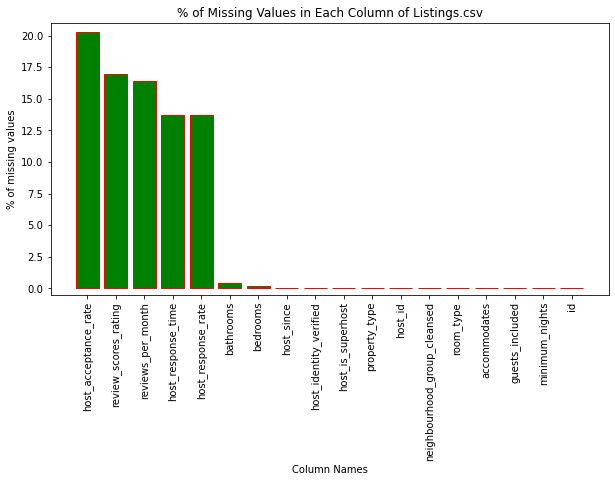

In [9]:
f, ax = plt.subplots(figsize=(10,5))
plt.bar(percentage_missing.keys(),percentage_missing.values(),color ='green', edgecolor='red',align='center', width =0.8)
plt.xticks(rotation='vertical')
plt.ylabel('% of missing values')
plt.xlabel('Column Names')
plt.ylim(-0.5, 21)
plt.title('% of Missing Values in Each Column of Listings.csv')
plt.show()

From the above graph we can see that we have missing values in most of the columns. We need to clean them before processing. Next, let us analyse calendar.csv.

### Understanding calendar.csv

Similar to listings.csv we are peforming basic checks such as shape, data type, missing values, etc for calendar data.

In [10]:
print('Shape of calendar.csv is',calendar.shape)
calendar.head() #displays first 5 rows in the dataset
#Viewing data in listing dataframe for analysis 
listings.head()

Shape of calendar.csv is (1393570, 4)


,id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,review_scores_rating,reviews_per_month
0,241032,956883,2011-08-11,within a few hours,96%,100%,f,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07
1,953595,5177328,2013-02-21,within an hour,98%,100%,t,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1,2,96.0,1.48
2,3308979,16708587,2014-06-12,within a few hours,67%,100%,f,t,Queen Anne,House,Entire home/apt,11,4.5,5.0,10,4,97.0,1.15
3,7421966,9851441,2013-11-06,NaN,NaN,NaN,f,t,Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,1,1,NaN,NaN
4,278830,1452570,2011-11-29,within an hour,100%,NaN,f,t,Queen Anne,House,Entire home/apt,6,2.0,3.0,6,1,92.0,0.89


In [11]:
# analysing the datatypes of each column 
calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

#### Analysing missing values in calendar.csv

From the analysis below we can see that 33% of NANs are present in price column.
Which helps us understand that we only had 33% listings occupied in a year on an average.

{'price': 32.938998399793334, 'available': 0.0, 'date': 0.0, 'listing_id': 0.0}


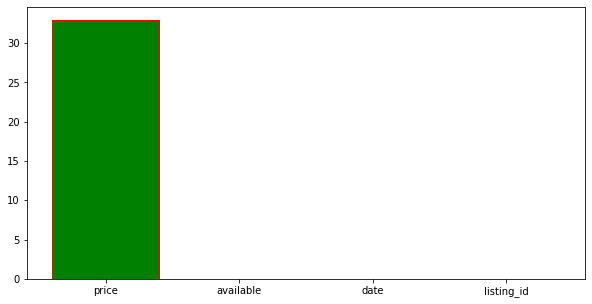

In [12]:
cal_percentage_missing = calendar.isna().mean().sort_values(ascending=False)
cal_percentage_missing = dict(cal_percentage_missing*100)
print(cal_percentage_missing)
f, ax = plt.subplots(figsize=(10,5))
plt.bar(cal_percentage_missing.keys(), cal_percentage_missing.values(), color ='green', edgecolor='red',align='center')
plt.show()

In [13]:
#Viewing data in calendar dataframe for analysis 
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


From the analysis done so far we can see that we have listing_id and id common in both the dataframes. Hence we can combine them into one for our futher analysis

Verifying to check that both the dataframes have equal number of unique ids before merging

In [14]:
#provide number of rows and columns in listings dataset
print('Count of unique ids in listing.csv: ', len(set(listings['id'])))
print('Count of unique ids in calendar.csv: ', len(set(calendar['listing_id'])))

Count of unique ids in listing.csv:  3818
Count of unique ids in calendar.csv:  3818


## 3. Data Preparation

In order to prepare the data for modelling, we must wrangle the data. For this, we need to clean the data for use to answer the objectives of the project. As a first step, before merging we can drop all rows containing null values in calendar.csv

#### Dropping null values in calendar.csv

In [15]:
#dropping rows containing null values in calendar.csv
calendar.dropna(inplace=True)

In [16]:
#Verifying calender.csv does not contain any null values
print('count of missing values in cal.csv : ', sum(calendar.isnull().sum()))

count of missing values in cal.csv :  0


### Merging dataframes

Merging both the dataframes based on listing id. Before merging let us rename the 'id' in listings.csv to ' listing_id'

#### Renaming ID column in listing to listing_id

In [17]:
# renaming id to listing_id
listings.rename(columns={'id':'listing_id'}, inplace=True)
listings.head(2)

,listing_id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,review_scores_rating,reviews_per_month
0,241032,956883,2011-08-11,within a few hours,96%,100%,f,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07
1,953595,5177328,2013-02-21,within an hour,98%,100%,t,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1,2,96.0,1.48


Merging listings and calender into one dataframe based on listing_id

In [18]:
# merging into one dataframe based on listing_id
df = pd.merge(calendar, listings, on='listing_id')
df.shape

(934542, 21)

Columns present in merged dataframe

In [19]:
cols_in_merged_df = list(df.columns)
print('column names in merged dataframe : ', cols_in_merged_df)

column names in merged dataframe :  ['listing_id', 'date', 'available', 'price', 'host_id', 'host_since', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_identity_verified', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'guests_included', 'minimum_nights', 'review_scores_rating', 'reviews_per_month']


In [20]:
# displaying merged dataframe
df.head()

,listing_id,date,available,price,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,review_scores_rating,reviews_per_month
0,241032,2016-01-04,t,$85.00,956883,2011-08-11,within a few hours,96%,100%,f,...,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07
1,241032,2016-01-05,t,$85.00,956883,2011-08-11,within a few hours,96%,100%,f,...,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07
2,241032,2016-01-13,t,$85.00,956883,2011-08-11,within a few hours,96%,100%,f,...,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07
3,241032,2016-01-14,t,$85.00,956883,2011-08-11,within a few hours,96%,100%,f,...,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07
4,241032,2016-01-18,t,$85.00,956883,2011-08-11,within a few hours,96%,100%,f,...,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07


### Cleansing Data

#### Removing special characters and converting data to numberic

Now that we have the required data for our analysis, we are going to do some data cleansing before processing the data. 

From the above, we can see that price column contains dollar symbol, few columns contain % symbols, etc. We are going to remove the dollar symbol and convert the values in price column to numeric. Similarly, removing % for host_response_rate column and converting to numberic


In [21]:
#Removing $ symbol and converting the values to numeric
def remove_dollar_convertNum(df,col_name):
    df[col_name] = df[col_name].str.replace("[$, ]", "").astype("float")
    return df

# convert columns host_response_rate to float by removing %
def remove_percentage_convertToNum(df, col_name):
    df[col_name] = df[col_name].str.replace("%", "").astype("float")
    return df

df = remove_dollar_convertNum(df,'price')
df = remove_percentage_convertToNum(df,'host_response_rate')
df = remove_percentage_convertToNum(df,'host_acceptance_rate')

In [22]:
df.head()

,listing_id,date,available,price,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,review_scores_rating,reviews_per_month
0,241032,2016-01-04,t,85.0,956883,2011-08-11,within a few hours,96.0,100.0,f,...,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07
1,241032,2016-01-05,t,85.0,956883,2011-08-11,within a few hours,96.0,100.0,f,...,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07
2,241032,2016-01-13,t,85.0,956883,2011-08-11,within a few hours,96.0,100.0,f,...,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07
3,241032,2016-01-14,t,85.0,956883,2011-08-11,within a few hours,96.0,100.0,f,...,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07
4,241032,2016-01-18,t,85.0,956883,2011-08-11,within a few hours,96.0,100.0,f,...,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07


#### Identifying missing/null values and replcaing with mean, median or mode

Next, let us identify the list of columns that contains null or missing values and replace them with mean, median or mode.

In [23]:
#Function to fill missing values with mean values
def fillna_mean(df,col):
    df[col].fillna(df[col].mean(), inplace = True)
    return df

# Filling mean values for the following columns:
fillna_mean(df,'host_response_rate')
fillna_mean(df,'review_scores_rating')

#Fill in missing values for bathrooms, bedrooms and beds with mode as mean wont be a good filling criteria here
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mode()[0])
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mode()[0])
df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].mode()[0])
df['host_is_superhost'] = df['host_is_superhost'].fillna(df['host_is_superhost'].mode()[0])
df['host_identity_verified'] = df['host_identity_verified'].fillna(df['host_identity_verified'].mode()[0])

# Filling missing values with median. Replacing missing values in reviews_per_month column with medium values since medium is better than mode in this case
df['reviews_per_month'].fillna(df['reviews_per_month'].median(),inplace=True)
df['host_response_rate'].fillna(df['host_response_rate'].median(),inplace=True)

df.head() 

,listing_id,date,available,price,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,review_scores_rating,reviews_per_month
0,241032,2016-01-04,t,85.0,956883,2011-08-11,within a few hours,96.0,100.0,f,...,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07
1,241032,2016-01-05,t,85.0,956883,2011-08-11,within a few hours,96.0,100.0,f,...,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07
2,241032,2016-01-13,t,85.0,956883,2011-08-11,within a few hours,96.0,100.0,f,...,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07
3,241032,2016-01-14,t,85.0,956883,2011-08-11,within a few hours,96.0,100.0,f,...,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07
4,241032,2016-01-18,t,85.0,956883,2011-08-11,within a few hours,96.0,100.0,f,...,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07


#### Identifying columns with boolean value and replacing with 0 or 1
The next step in cleaning process is to convert all 't'/'f' values into 0 or 1 and replacing mode for missing values in these columns

In [24]:
# list containing columns to be converted
boolen_cols = ['available','host_is_superhost','host_identity_verified']

df[boolen_cols]= df[boolen_cols].astype('str')

# function to replace t:1 and f:0
def replace_bool_toNum(df,lst):
    for col in lst:
        df[col].replace({'t':1.0, 'f':0.0}, inplace = True)
        
replace_bool_toNum(df,boolen_cols)

df.head()

,listing_id,date,available,price,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,review_scores_rating,reviews_per_month
0,241032,2016-01-04,1.0,85.0,956883,2011-08-11,within a few hours,96.0,100.0,0.0,...,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07
1,241032,2016-01-05,1.0,85.0,956883,2011-08-11,within a few hours,96.0,100.0,0.0,...,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07
2,241032,2016-01-13,1.0,85.0,956883,2011-08-11,within a few hours,96.0,100.0,0.0,...,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07
3,241032,2016-01-14,1.0,85.0,956883,2011-08-11,within a few hours,96.0,100.0,0.0,...,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07
4,241032,2016-01-18,1.0,85.0,956883,2011-08-11,within a few hours,96.0,100.0,0.0,...,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07


#### Identifying columns containing dates and converting them into pd.datetime format to fetch date and year for processing.

We are now going to convert all columns of containing dates into datetime format and fetch month and year for our analysis.

In [25]:
# converting date column into datetime format
df['date'] = pd.to_datetime(df['date'])

# getting month from date and storing in month column
df['month']= df['date'].dt.month

# getting year from date and storing in year column
df['year']= df['date'].dt.year

Similary getting year from host_since column

In [26]:
# converting host_since column into datetime format
df['host_since_year']= pd.to_datetime(df['host_since'],errors='coerce')

# getting year from date and storing in year_HostSince column
df['year_HostSince']= df['host_since_year'].dt.year

# converting to int datatype
df['year_HostSince']= df['year_HostSince'].astype('Int64')

Now that we have got data in the desired format, we are dropping off the columns

In [27]:
df.drop(columns=['date','host_since_year','host_since'],inplace=True, axis=0)

In [28]:
df.head(3)

,listing_id,available,price,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_group_cleansed,...,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,review_scores_rating,reviews_per_month,month,year,year_HostSince
0,241032,1.0,85.0,956883,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,...,4,1.0,1.0,2,1,95.0,4.07,1,2016,2011
1,241032,1.0,85.0,956883,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,...,4,1.0,1.0,2,1,95.0,4.07,1,2016,2011
2,241032,1.0,85.0,956883,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,...,4,1.0,1.0,2,1,95.0,4.07,1,2016,2011


### Analysis and it visualization

Now, that we have our dataset ready, let us try to answer some of the questions.

### Q1. Which are the busiest or most popular time of the year to rent?

In [46]:
#we are getting the count of listings, irrespective of available or unavailable for each month
df2 = df[df['year'] == 2016].groupby(['month'])['listing_id'].count().reset_index(name="count_listings")

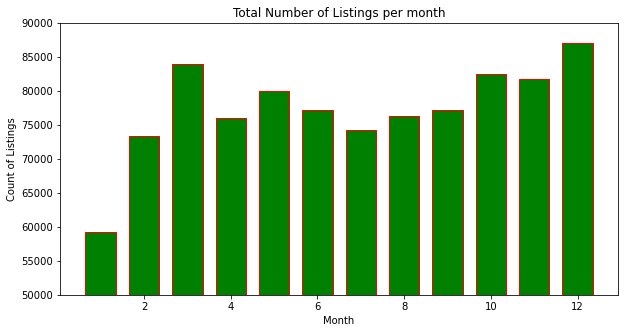

In [47]:

f, ax = plt.subplots(figsize=(10,5))

plt.bar(np.arange(1,13,step=1),df2['count_listings'],color='green',edgecolor='red',align='center', width =0.7)
plt.xlabel('Month')
plt.ylabel('Count of Listings')
plt.title('Total Number of Listings per month')
plt.ylim(50000, 90000)
plt.show()

From the above graph, we can see that the listings are,
1. Lowest listings are in the month of January (during Winter)
2. Other months where the listings are lesser is Feb, Apr and July
3. Listings are higher in the months: March, Oct and Dec. Dec being the highest (taken data for both 2016 year) and are the busiest and most popular time of the year to rent.

### Q2. Analyse the prices of listings to see which are the most expensive months for listings

In [31]:
# calculating min , max and average price listings
min_val = df['price'].min()
max_val = df['price'].max()
mean_val = df['price'].mean()
print('From the dataset, we can see that:')
print('Lowest_price is : ', min_val, '$')
print('Highest_price is : ', max_val, '$')
print('Average_price is : ', round(mean_val,2), '$')


From the dataset, we can see that:
Lowest_price is :  10.0 $
Highest_price is :  1650.0 $
Average_price is :  137.94 $


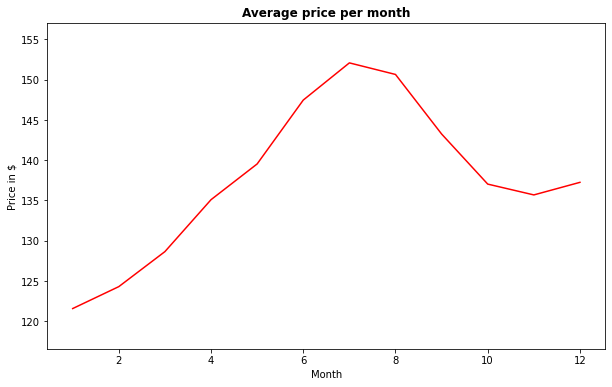

In [32]:
# plotting avergae price per month
avg_price_by_month = df[df['year']==2016].groupby(['month'])['price'].mean()
plt.figure(figsize = (10,6))
plt.plot(avg_price_by_month,color='red');
plt.title('Average price per month', fontweight = 'bold');
plt.xlabel('Month');
plt.ylabel('Price in $')
plt.ylim(avg_price_by_month.min()-5, avg_price_by_month.max()+5)
plt.show()

From the graph above, we can see that,
1. The highest price listing happened in the month of July during summer in Seatle. We can also see that the prices are slightly higer in December since it is the most busiest month.
2. The lowest price listing happend during January during winter and slowly increasing from there.

### Number of listings month wise

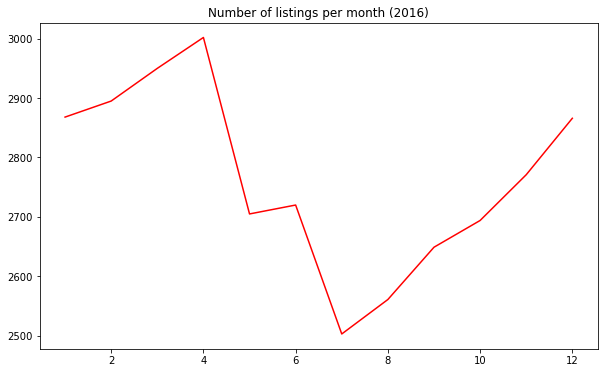

In [33]:
# plotting number of listings per month
plt.figure(figsize = (10,6))
plt.plot(df[df['year'] == 2016].groupby(['month'])['listing_id'].nunique(),color='red');
plt.title('Number of listings per month (2016)');

From the above graph, we can see that,
1. July has the lowest number of listings
2. And, April has the most number of listings

### Q3.How are the prices varying across all neighbourhood in Seattle

In [34]:
#getting list of neighbourhoood areas in Seattle
areas = df.neighbourhood_group_cleansed.unique()
areas

array(['Queen Anne', 'Ballard', 'Other neighborhoods', 'Cascade',
       'Central Area', 'University District', 'Downtown', 'Magnolia',
       'West Seattle', 'Interbay', 'Beacon Hill', 'Rainier Valley',
       'Delridge', 'Seward Park', 'Northgate', 'Capitol Hill',
       'Lake City'], dtype=object)

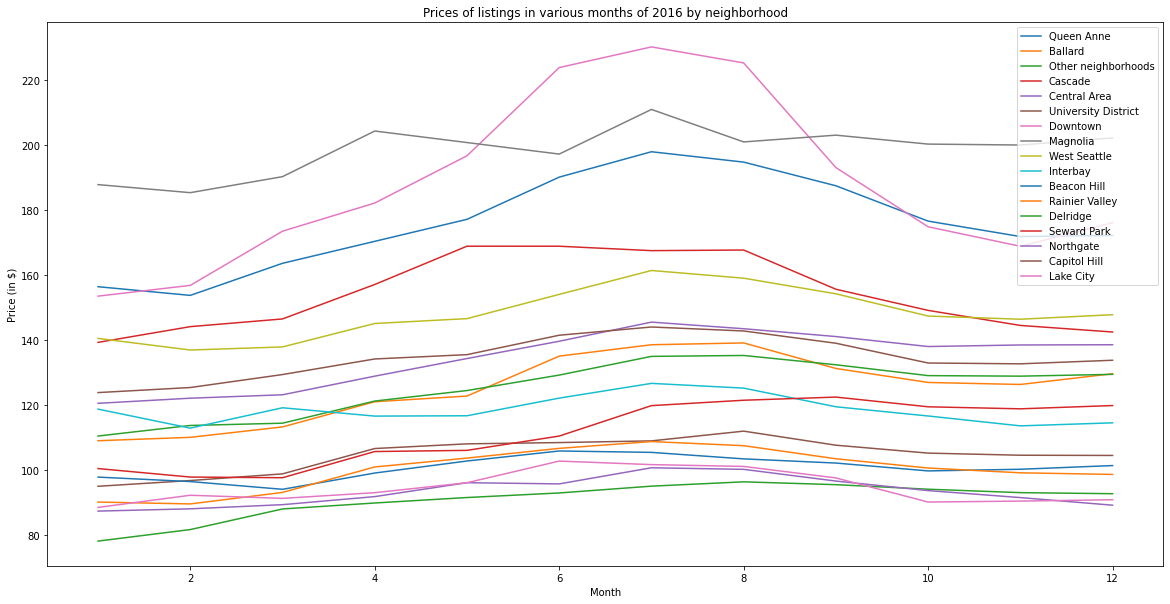

In [35]:
Nghood_df = pd.DataFrame(df.groupby(['neighbourhood_group_cleansed','month'])['price'].mean().reset_index())
n1 = Nghood_df['neighbourhood_group_cleansed']

plt.figure(figsize= (20,10))
ax = plt.subplot()
for x in areas:
    ax.plot(Nghood_df[n1 == x]['month'],
            Nghood_df[n1 == x]['price'],
            label = x
           )
ax.legend(loc = 'upper right')
plt.xlabel('Month');
plt.ylabel('Price (in $)');
plt.title('Prices of listings in various months of 2016 by neighborhood');

From the graph above we can see that almost all the areas have higher prices in July (Summar). 'Downtown' is the highest of all.

## 4. Data Modelling

We are now ready to prepare our data for modelling.

### Q4. What are all the important features to determine the price of the listing? Can this be modelled?

We are now going to build the following models,

1. Least Absolute Shrinkage and Selection Operator (LASSO) Regression Model
2. Random Forest Model

For modelling, we need to turn categorical data into dummy values for the columns of type object.

In [36]:
# converting categorical data into dummy values for modelling
df1 =  pd.get_dummies(df.select_dtypes(['object'])) 
df1

,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_group_cleansed_Ballard,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,...,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934537,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
934538,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
934539,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
934540,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Now, we are going to combine the original dataframe with the dummy values dataframe which we just created above

In [37]:
# concatenating both the dataframes
df_merged = pd.concat([df.select_dtypes(['number']),df1],axis=1)

In [38]:
#final datafreame for modelling
df_merged

,listing_id,available,price,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,accommodates,bathrooms,...,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,241032,1.0,85.0,956883,96.0,100.0,0.0,1.0,4,1.0,...,0,0,0,0,0,0,0,1,0,0
1,241032,1.0,85.0,956883,96.0,100.0,0.0,1.0,4,1.0,...,0,0,0,0,0,0,0,1,0,0
2,241032,1.0,85.0,956883,96.0,100.0,0.0,1.0,4,1.0,...,0,0,0,0,0,0,0,1,0,0
3,241032,1.0,85.0,956883,96.0,100.0,0.0,1.0,4,1.0,...,0,0,0,0,0,0,0,1,0,0
4,241032,1.0,85.0,956883,96.0,100.0,0.0,1.0,4,1.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934537,10208623,1.0,87.0,14703116,100.0,100.0,0.0,1.0,3,1.5,...,0,0,0,0,0,0,0,1,0,0
934538,10208623,1.0,87.0,14703116,100.0,100.0,0.0,1.0,3,1.5,...,0,0,0,0,0,0,0,1,0,0
934539,10208623,1.0,87.0,14703116,100.0,100.0,0.0,1.0,3,1.5,...,0,0,0,0,0,0,0,1,0,0
934540,10208623,1.0,87.0,14703116,100.0,100.0,0.0,1.0,3,1.5,...,0,0,0,0,0,0,0,1,0,0


We have our datasets ready. Let us now prepare the training and testing datasets by splitting the original data for modelling.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

#preparing training and testing datasets
X = df_merged.drop(['price','year_HostSince'],axis=1)
y = df_merged['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Transform features by scaling each feature to a given range.
s = MinMaxScaler()
X_train_new = s.fit_transform(X_train)
X_test_new = s.transform(X_test)

X_train.head()

,listing_id,available,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,accommodates,bathrooms,bedrooms,...,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
1016,278830,1.0,1452570,100.0,100.0,0.0,1.0,6,2.0,3.0,...,1,0,0,0,0,0,0,1,0,0
864106,9156273,1.0,19994652,90.0,100.0,0.0,1.0,2,1.0,1.0,...,1,0,0,0,0,0,0,0,1,0
740413,3441402,1.0,383230,100.0,100.0,0.0,1.0,3,1.0,0.0,...,1,0,0,0,0,0,0,1,0,0
505762,1048798,1.0,5774906,100.0,100.0,1.0,1.0,4,2.0,1.0,...,1,0,0,0,0,0,0,1,0,0
438828,86185,1.0,192355,100.0,100.0,0.0,1.0,2,1.0,1.0,...,1,0,0,0,0,0,0,0,1,0


Let us being with Linear Regression Model for our prediction

Linear Regression Model Score:
Training_score = 0.62
Testing_score = 0.62


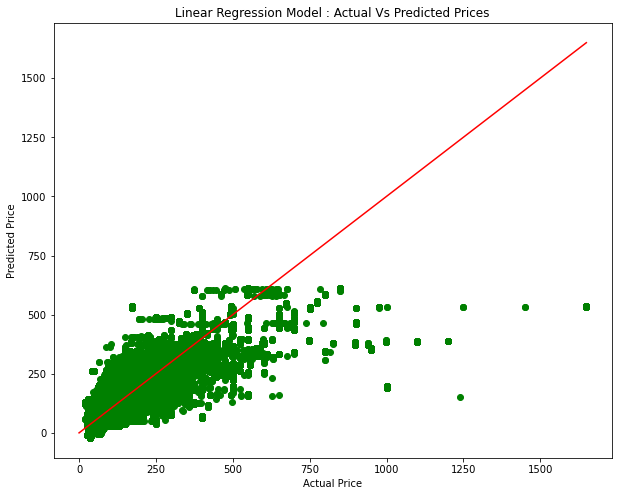

In [40]:
# Linear Regression Model
LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X_train_new,y_train)

# model scoring
training_score = LinearRegressionModel.score(X_train_new,y_train)
testing_score = LinearRegressionModel.score(X_test_new,y_test)

#printing the model scoring
print('Linear Regression Model Score:')
print("Training_score = {:.2f}".format(training_score))
print("Testing_score = {:.2f}".format(testing_score))

# Validating the model with testing testdata
yPred_LinR = LinearRegressionModel.predict(X_test_new)

# plotting graph of the results for actual vs predicted price
plt.figure(figsize = (10,8))
plt.scatter(y_test,yPred_LinR,marker='o',color='green');
x = np.linspace(0,max(y_test));
plt.plot(x,np.linspace(0,max(y_test)),color = 'r');
plt.xlabel('Actual Price');
plt.ylabel('Predicted Price');
plt.title('Linear Regression Model : Actual Vs Predicted Prices');
plt.show()

Let us now move to a slightly better linear regression model 'Lasso Regression Model'. Lasso Regression Model is better at deducting features and capturing correlations among them.

### Model 2: Lasso Regression Model

Lasso Regression Model Score:
Training_score = 0.61
Testing_score = 0.61


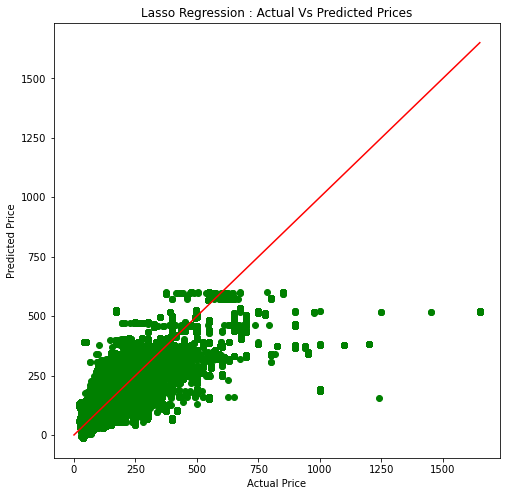

In [41]:
# Lasso Regression Model
LassoRegressionModel = Lasso(alpha=0.1)
LassoRegressionModel.fit(X_train_new,y_train)

# Model scoring
training_score = LassoRegressionModel.score(X_train_new,y_train)
testing_score = LassoRegressionModel.score(X_test_new,y_test)

#printing the model scoring
print('Lasso Regression Model Score:')
print("Training_score = {:.2f}".format(training_score))
print("Testing_score = {:.2f}".format(testing_score))

#Lasso Regression Model performance
y_pred_las_Reg = LassoRegressionModel.predict(X_test_new)

plt.figure(figsize = (8,8))
plt.scatter(y_test,y_pred_las_Reg,marker='o',color='green');
x = np.linspace(0,max(y_test));
plt.plot(x,x,color = 'r');
plt.xlabel('Actual Price');
plt.ylabel('Predicted Price');
plt.title('Lasso Regression : Actual Vs Predicted Prices');
plt.show()


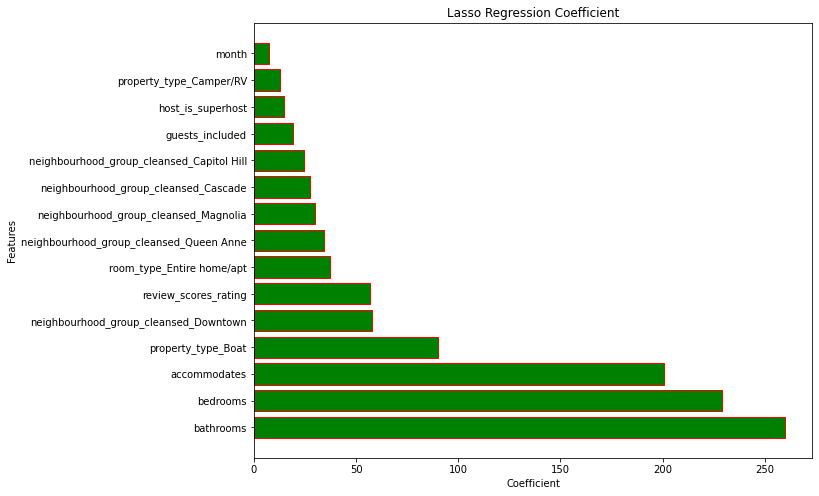

In [51]:
# Coefficient for Lasso Regression Model
lasso_coef,coef,c = LassoRegressionModel.coef_, 'Coefficient','Features'
Lasso_Coefs = pd.DataFrame({c:X_train.columns,coef:lasso_coef}).sort_values(by=coef,ascending=False).reset_index().drop(['index'],axis=1)[:15]

#Plottting in chart
f, ax = plt.subplots(figsize=(10,8))
plt.barh(Lasso_Coefs['Features'],Lasso_Coefs['Coefficient'],color='green',edgecolor='red',align='center')
plt.title('Lasso Regression Coefficient')
plt.ylabel('Features')
plt.xlabel('Coefficient')
plt.show()

From the graph above on Feature importance_Lasso Reg, although it is better than Linear Regression in terms of capturing feature importance, we still need a model that has the capacity to model complicated relationships between the features and the target variables. Therefore we try Random Forest.

### Model 3: Random Forest Regressor

Random Forest Regression Model Score:
Training_score = 0.98
Testing_score = 0.98
Mean Squared Error: Train: 176.07, Test: 203.27
R Squared for Train: 0.98, Test: 0.98


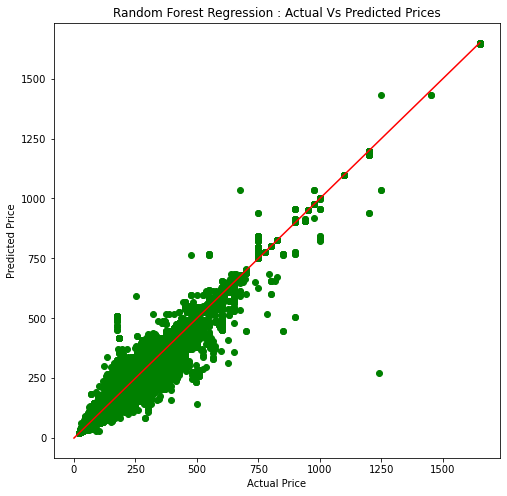

In [43]:
# Random Forest Model
Random_Forest_Reg = RandomForestRegressor(n_estimators=100,
                                random_state= 42,
                                n_jobs=-1
                               )
Random_Forest_Reg.fit(X_train,y_train)

# Model scoring
training_score = Random_Forest_Reg.score(X_train,y_train)
testing_score = Random_Forest_Reg.score(X_test,y_test)


#printing the model scoring
print('Random Forest Regression Model Score:')
print("Training_score = {:.2f}".format(training_score))
print("Testing_score = {:.2f}".format(testing_score))

#Validating model performance
y_test_preds_RF = Random_Forest_Reg.predict(X_test)
y_train_preds_RF = Random_Forest_Reg.predict(X_train)

# printing mean_squared_error and r2_score
print('Mean Squared Error: Train: %.2f, Test: %.2f' % (
        mean_squared_error(y_train, y_train_preds_RF),
        mean_squared_error(y_test, y_test_preds_RF)))
print('R Squared for Train: %.2f, Test: %.2f' % (
        r2_score(y_train, y_train_preds_RF),
        r2_score(y_test, y_test_preds_RF)))

plt.figure(figsize = (8,8))
plt.scatter(y_test,y_test_preds_RF,marker='o',color='green');
x = np.linspace(0,max(y_test));
plt.plot(x,x,color = 'r');
plt.xlabel('Actual Price');
plt.ylabel('Predicted Price');
plt.title('Random Forest Regression : Actual Vs Predicted Prices');

We can see that Random forest model is good at predicting the prices.

In [44]:
# Getting the most influential features in determining the price of the property
imp_features = pd.DataFrame({
        'Features' : X_train.columns,
    'Importance_of_feature' : Random_Forest_Reg.feature_importances_})


imp_features = imp_features.sort_values(by=['Importance_of_feature'],ascending=False).reset_index().drop(['index'],axis=1)[:15]


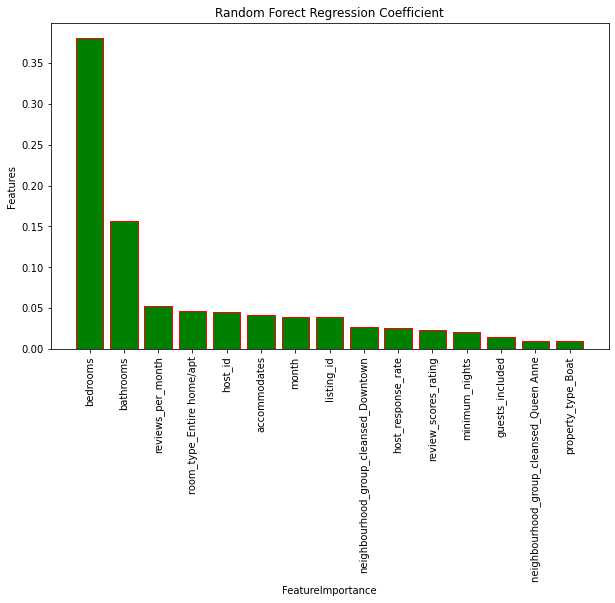

In [52]:
#Plottting in chart
f, ax = plt.subplots(figsize=(10,6))
y_pos = np.arange(len(imp_features['Features']))
plt.bar(y_pos,imp_features['Importance_of_feature'],color='green', edgecolor='red',align='center')
plt.xticks(y_pos, imp_features['Features'], rotation=90)
plt.title('Random Forect Regression Coefficient')
plt.ylabel('Features')
plt.xlabel('FeatureImportance')
plt.show()

The above given bar chart shows the top 15 features that are most influential towards price.Number of bedrooms is the most important feature for predicting price!

### Conclusion

We have analysed the dataset and have ansered the following after analyses and modelling

    1. Identied the busiest or most popular time of the year to rent
    2. Viewed the most and least expensive months for listing
    3. Prices variation across all neighbourgood in Seattle
    4. Identified top 15 most influential features in determining the price of a listing. And this is modeelinf using,
        a. Lassor Regression Model 
        b. Random Forest Model 
       
Along with the above listed objectives, we have also covered other questions such as what are the most expensive time of the year to rent, how many listings are published month wise, etc.